# Overview

This week's curriculum focuses in figuring out (and visualizing) what's special about a certain text (or collection of texts). We'll also learn about community detection in networks (that's how we'll get our groups of text)

* Tricks for raw text (NLPP, Chapter 3).
* Community Detection and info-boxes 
* Identifying important words in a document (TF-IDF)

In the first part, we will take a quick tour of NLPP1e's chapter 3, which is boring, but an amazing ressource that you'll keep returning to. Then we'll talk about how we can use simple statistics & machine learning to get text to show us what it's all about. We will even do a little visualization. 

In the latter parts we will go back to network science, discussing community detection, mixing in some NLP, and trying it all out on our very own dataset.


# Part 1: Processing real text (from out on the inter-webs)

Ok. So Chapter 3 in NLPP is all about working with text from the real world. Getting text from this internet, cleaning it, tokenizing, modifying (e.g. stemming, converting to lower case, etc) to get the text in shape to work with the NLTK tools you've already learned about - and many more. 

In the process we'll learn more about regular expressions, as well as unicode; something we've already been struggling with a little bit will now be explained in more detail. 
> 
> **Video lecture**: Short overview of chapter 3 + a few words about kinds of language processing that we don't address in this class. 
> 

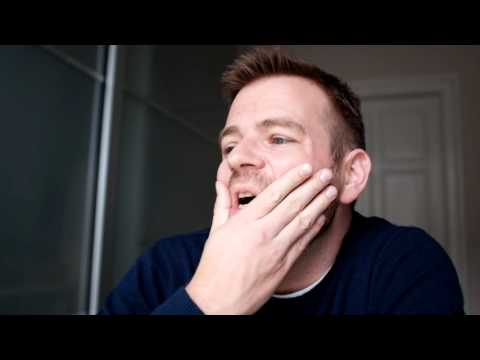

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Rwakh-HXPJk",width=800, height=450)

> *Reading*: NLPP Chapter 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, and 3.10\. It's not important that you go in depth with everything here - the key think is that you *know that Chapter 3 of this book exists*, and that it's a great place to return to if you're ever in need of an explanation of regular expressions, unicode, or other topics that you forget as soon as you stop using them (and don't worry, I forget about those things too).
> 

# Part 2: Community detection

Before we get started on *network* communities, we'll grab some information on a different kind of communities based on information from Wikipedia. Specifically, the ``infoboxes``. An infobox is the little box usually displayed on the right when you open an artist's page. 

For example if you open the page for [Old 97's](https://en.wikipedia.org/wiki/Old_97%27s), you'll see that it contains info about their ***origin***, the ***genre***s of music they've been associated with, their ***year's active***, the record ***labels*** they've signed with, etc. All really interesting information if we want to understand the network of artists.

Today, we'll be playing with **genre**. It's not easy to extract information from the infoboxes, but one of your amazing TAs (Aliaksandr) has done the job for you already (he even parsed the html to get data for more artists).

> **You can download the genres [here](https://raw.githubusercontent.com/SocialComplexityLab/socialgraphs2024/refs/heads/main/files/artists_genres_dictionary.txt)**.



Now, let's watch a lecture to learn about communities. If you want all the details, I recommend you take a look at _Chapter 9_ in the _Network Science_ book ... but the video lecture below should be enough to get you started. 

**Note**: For this and the next exercise, work on the _undirected_ version of the network.

> **_Video Lecture_**: Communities in networks. 

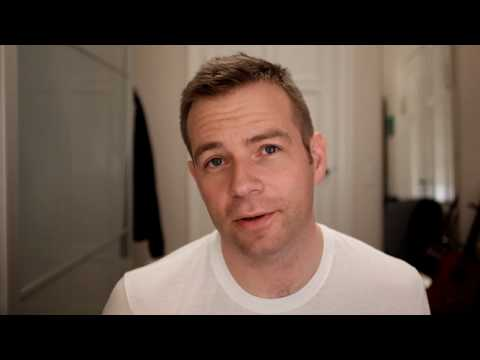

In [6]:
YouTubeVideo("FSRoqXw28RI",width=800, height=450)

*Exercise*: Use the concept of modularity to explore how _community-like_ the genres are.
> 
> * Explain the concept of modularity in your own words.
> * Work from the undirected version of the network, keeping only the nodes for which you have genre information in the file above. 
> * Now create your own partition of the network into genres.
>      * **Each node is simply characterized by the *first genre* in its list of genres**
>      * Each community is the group of nodes that share the same genre.
>      * That's all you need, now calculate the modularity of this division of the network into genres.
>      * **Note**: Modularity is described in the _Network Science_ book, section 9.4.. Thus, use **equation 9.12** in the book to calculate the modularity _M_ of the partition described above. Are the genres good communities?

<div class="alert alert-block alert-info">
Overall, it's OK to use an LLM to help with the code here. But do write your own explanation of modularity, and do try to implement a modularity on your own from eq 9.12 in the book.
</div>

In [1]:
import networkx as nx
import ast
from itertools import combinations

# Step 1: Load the dictionary from a text file
def load_genre_dictionary(file_path):
    with open(file_path, 'r') as file:
        genre_dict = ast.literal_eval(file.read())  # Safely evaluate the string representation of the dictionary
    return genre_dict

# Step 2: Create the edge list based on shared genres
def create_edge_list(genre_dict):
    edge_list = []
    artists = list(genre_dict.keys())
    
    # Compare each pair of artists
    for artist1, artist2 in combinations(artists, 2):
        genres1 = set(genre_dict[artist1])
        genres2 = set(genre_dict[artist2])
        
        # If they share at least one genre, create an edge
        if genres1.intersection(genres2):
            edge_list.append((artist1, artist2))
    
    return edge_list

# Step 3: Create the genre partition (using the first genre only)
def create_genre_partition(genre_dict):
    genre_partition = {}
    node_to_genre = {}  # Dictionary mapping nodes to their first genre
    for artist, genres in genre_dict.items():
        # Take the first genre
        first_genre = genres[0] if genres else None
        if first_genre:
            node_to_genre[artist] = first_genre
            if first_genre not in genre_partition:
                genre_partition[first_genre] = []
            genre_partition[first_genre].append(artist)
    return genre_partition, node_to_genre

# Step 4: Calculate Lc (total edges in the community) and kc (total degree in the community)
def community_modularity(graph, genre_partition):
    total_edges = graph.number_of_edges()
    modularity = 0.0
    
    for genre, nodes in genre_partition.items():
        # Subgraph for the community
        subgraph = graph.subgraph(nodes)
        L_c = subgraph.number_of_edges()  # Number of edges within the community
        k_c = sum(dict(graph.degree(nodes)).values())  # Total degree of the nodes in the community
        
        # Modularity contribution for this community
        modularity += (L_c / total_edges) - (k_c / (2 * total_edges)) ** 2

    return modularity

# Step 5: Main function to run everything
def main(genre_file_path):
    # Load genre dictionary
    genre_dict = load_genre_dictionary(genre_file_path)

    # Create the edge list based on shared genres
    edge_list = create_edge_list(genre_dict)
    
    # Create a graph from the edge list
    graph = nx.Graph(edge_list)

    # Create genre partition based on the first genre
    genre_partition, node_to_genre = create_genre_partition(genre_dict)

    # Calculate modularity
    modularity = community_modularity(graph, genre_partition)

    print(f"Modularity of the genre partition: {modularity}")

# Example usage
genre_file_path = r"C:\Users\jdiaz\Desktop\DTU_SocialGraphs\socialgraphs2024\artists_genres_dictionary.txt"
main(genre_file_path)


Modularity of the genre partition: 0.014397552317356939


High modularity (M close to 1) suggests that the genre communities are strong, meaning that there are many edges within communities (nodes of the same genre) and few edges between communities.

Low or negative modularity indicates that the division into genres is not a good community structure for the network, suggesting a random or poor association between nodes of the same genre.

*Exercise*: Community detection finding structral communities in the network
> * Again, work only with the subnetwork of nodes that have a genre according to Aliaksandr's list (that you downloaded above). 
> * Use [the Python Louvain-algorithm implementation](http://perso.crans.org/aynaud/communities/) to find communities each network. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the genres as communities? What does this comparison reveal about them?
>     * **Note**: This implementation is also available as Anaconda package. Install with `conda` as expained [here](https://anaconda.org/auto/python-louvain). 
>     * **Note**: You can also try the *Infomap* algorithm instead if you're curious. Go to [this page]. (http://www.mapequation.org/code.html) and search for 'python'. It's harder to install, but a better community detection algorithm.
> * What is the modularity of this partitioning of the network? Is it more community-like than the genres?
> * Visualize the network, using the Force Atlas algorithm (see Lecture 5, exercise 2).
>     * This time assign each node a different color based on its structural _community_.
>     * **Note**: If there's a lot of small communities, it's OK to only color the 5-10 largest communities (you can make the remaing nodes light gray or some netural color)
>     * Describe the structure you observe.

<div class="alert alert-block alert-info">
It's OK to use an LLM to help with the code here. 
</div>

In [7]:
!pip install python-louvain


Louvain Modularity: 0.03433551191971657


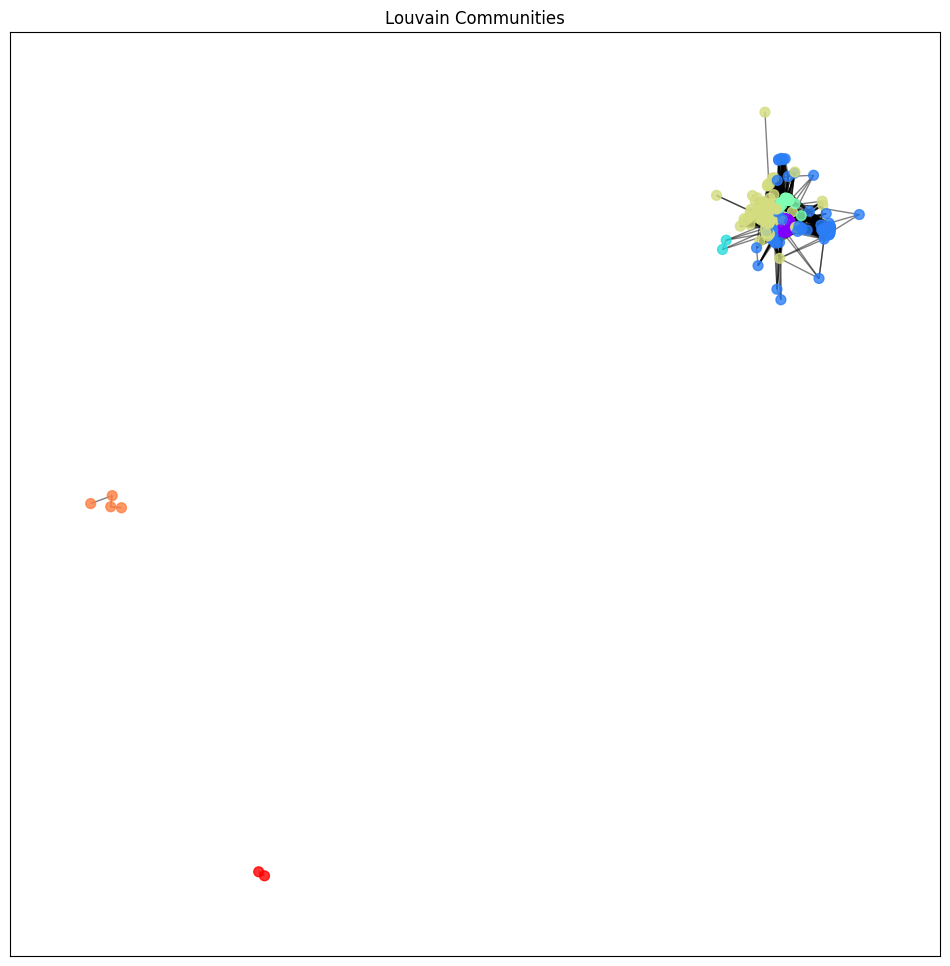

In [9]:
import networkx as nx
import ast
import matplotlib.pyplot as plt
from networkx.algorithms.community import louvain_communities
from networkx.algorithms.community.quality import modularity

# Step 1: Load the dictionary from a text file
def load_genre_dictionary(file_path):
    with open(file_path, 'r') as file:
        genre_dict = ast.literal_eval(file.read())  # Safely evaluate the string representation of the dictionary
    return genre_dict

# Step 2: Create the edge list based on shared genres
def create_edge_list(genre_dict):
    edge_list = []
    artists = list(genre_dict.keys())
    
    # Compare each pair of artists
    for artist1, artist2 in combinations(artists, 2):
        genres1 = set(genre_dict[artist1])
        genres2 = set(genre_dict[artist2])
        
        # If they share at least one genre, create an edge
        if genres1.intersection(genres2):
            edge_list.append((artist1, artist2))
    
    return edge_list

# Step 3: Create the subnetwork (only nodes with genre information)
def create_subnetwork(graph, genre_dict):
    nodes_with_genres = set(genre_dict.keys())
    return graph.subgraph(nodes_with_genres)

# Step 4: Apply Louvain algorithm using networkx
def apply_louvain_communities(graph):
    communities = louvain_communities(graph)  # Find Louvain communities
    return communities

# Step 5: Calculate the modularity for the Louvain communities
def calculate_modularity(graph, communities):
    return modularity(graph, communities)

# Step 6: Visualize the graph with Louvain communities
def visualize_louvain_communities(graph, communities, title="Louvain Communities"):
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(graph)  # Layout for visualization

    # Assign each community a different color
    community_colors = {node: idx for idx, community in enumerate(communities) for node in community}
    colors = [community_colors[node] for node in graph.nodes()]

    nx.draw_networkx_nodes(graph, pos, node_color=colors, node_size=50, cmap=plt.cm.rainbow, alpha=0.8)
    nx.draw_networkx_edges(graph, pos, alpha=0.5)
    plt.title(title)
    plt.show()

# Step 7: Main function
def main(genre_file_path):
    # Load genre dictionary
    genre_dict = load_genre_dictionary(genre_file_path)

    # Create the edge list based on shared genres
    edge_list = create_edge_list(genre_dict)
    
    # Create a graph from the edge list
    graph = nx.Graph(edge_list)

    # Create the subnetwork (only with nodes that have genres)
    subgraph = create_subnetwork(graph, genre_dict)

    # Apply Louvain algorithm using networkx
    communities = apply_louvain_communities(subgraph)

    # Calculate the modularity
    louvain_modularity = calculate_modularity(subgraph, communities)
    print(f"Louvain Modularity: {louvain_modularity}")

    # Visualize the communities
    visualize_louvain_communities(subgraph, communities)
# Example usage
genre_file_path = r"C:\Users\jdiaz\Desktop\DTU_SocialGraphs\socialgraphs2024\artists_genres_dictionary.txt"
main(genre_file_path)


Ok, now in this final community exercise, we want to check if the genres align with the communities.


> *Exercise*: Communities versus genres.
> * Compare the communities found by your algorithm with the music genres by creating a matrix $D$ with dimension ($G \times C$), where G is the 7 most common genres and C is the 7 most common communities. We set entry $D(i,j)$ to be the number of nodes that genre $i$ has in common with community $j$. The matrix $D$ is what we call a confusion matrix.
> * Use the confusion matrix to explain how well the communities you've detected correspond to the genres.
>     * **Note**: This time, use all the genres associate with each node
>     * **Note**: If a node is not characterized by any of the 7 most popular genres, just ignore it.
>     * **Note**: If a node is not part of by any of the 7 largest communiteis, just ignore it.

<div class="alert alert-block alert-info">
Again, you may use an LLM to help with the code for this assignment. The main thing is you get the D matrix right and interpret it.
</div>

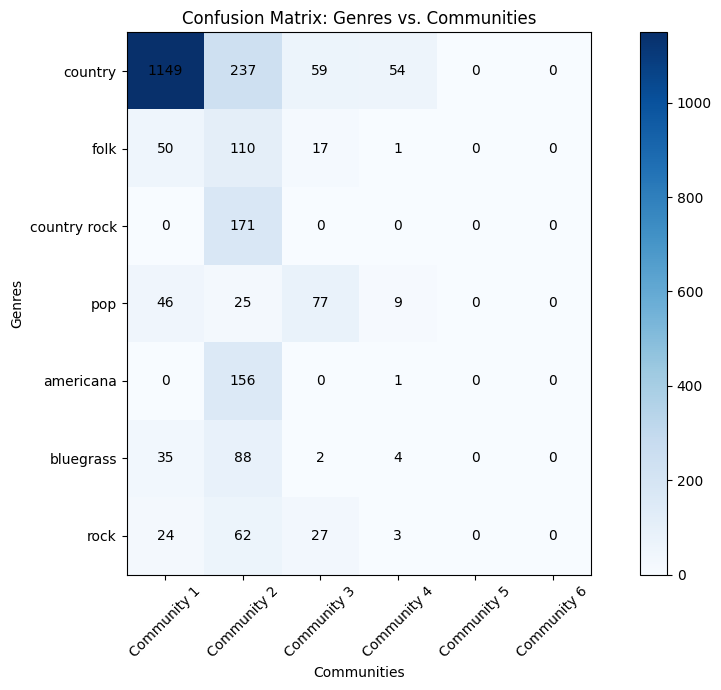

In [10]:
import networkx as nx
import ast
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from networkx.algorithms.community import louvain_communities

# Step 1: Load the dictionary from a text file
def load_genre_dictionary(file_path):
    with open(file_path, 'r') as file:
        genre_dict = ast.literal_eval(file.read())  # Safely evaluate the string representation of the dictionary
    return genre_dict

# Step 2: Create the edge list based on shared genres
def create_edge_list(genre_dict):
    edge_list = []
    artists = list(genre_dict.keys())
    
    # Compare each pair of artists
    for artist1, artist2 in combinations(artists, 2):
        genres1 = set(genre_dict[artist1])
        genres2 = set(genre_dict[artist2])
        
        # If they share at least one genre, create an edge
        if genres1.intersection(genres2):
            edge_list.append((artist1, artist2))
    
    return edge_list

# Step 3: Create the subnetwork (only nodes with genre information)
def create_subnetwork(graph, genre_dict):
    nodes_with_genres = set(genre_dict.keys())
    return graph.subgraph(nodes_with_genres)

# Step 4: Apply Louvain algorithm using networkx
def apply_louvain_communities(graph):
    communities = louvain_communities(graph)  # Find Louvain communities
    return communities

# Step 5: Identify the 7 most common genres and 7 largest communities
def get_top_genres_and_communities(genre_dict, communities):
    # Get top 7 most common genres
    all_genres = [genre for genres in genre_dict.values() for genre in genres]
    genre_counter = Counter(all_genres)
    top_genres = [genre for genre, _ in genre_counter.most_common(7)]
    
    # Get top 7 largest communities
    community_sizes = [len(community) for community in communities]
    top_communities = sorted(communities, key=lambda x: len(x), reverse=True)[:7]
    
    return top_genres, top_communities

# Step 6: Create the confusion matrix
def create_confusion_matrix(genre_dict, top_genres, top_communities):
    # Initialize the confusion matrix
    D = np.zeros((len(top_genres), len(top_communities)))

    # Map genre to index
    genre_to_index = {genre: idx for idx, genre in enumerate(top_genres)}
    
    # Loop through top communities
    for j, community in enumerate(top_communities):
        for node in community:
            if node in genre_dict:
                # Get the genres of the node
                node_genres = genre_dict[node]
                
                # Increment the matrix if the genre is in the top 7 genres
                for genre in node_genres:
                    if genre in genre_to_index:
                        i = genre_to_index[genre]
                        D[i, j] += 1
                        
    return D

# Step 7: Visualize the confusion matrix
def visualize_confusion_matrix(D, top_genres, top_communities):
    plt.figure(figsize=(10, 7))
    plt.imshow(D, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix: Genres vs. Communities")
    plt.colorbar()
    
    # Set genre and community labels
    plt.xticks(np.arange(len(top_communities)), [f"Community {i+1}" for i in range(len(top_communities))], rotation=45)
    plt.yticks(np.arange(len(top_genres)), top_genres)
    
    # Display the values in the matrix
    for i in range(D.shape[0]):
        for j in range(D.shape[1]):
            plt.text(j, i, int(D[i, j]), ha='center', va='center', color='black')

    plt.xlabel("Communities")
    plt.ylabel("Genres")
    plt.tight_layout()
    plt.show()

# Step 8: Main function
def main(genre_file_path):
    # Load genre dictionary
    genre_dict = load_genre_dictionary(genre_file_path)

    # Create the edge list based on shared genres
    edge_list = create_edge_list(genre_dict)
    
    # Create a graph from the edge list
    graph = nx.Graph(edge_list)

    # Create the subnetwork (only with nodes that have genres)
    subgraph = create_subnetwork(graph, genre_dict)

    # Apply Louvain algorithm using networkx
    communities = apply_louvain_communities(subgraph)

    # Identify the top 7 most common genres and largest communities
    top_genres, top_communities = get_top_genres_and_communities(genre_dict, communities)

    # Create the confusion matrix
    D = create_confusion_matrix(genre_dict, top_genres, top_communities)

    # Visualize the confusion matrix
    visualize_confusion_matrix(D, top_genres, top_communities)
    return communities

    
 # Example usage
genre_file_path = r"C:\Users\jdiaz\Desktop\DTU_SocialGraphs\socialgraphs2024\artists_genres_dictionary.txt"
main(genre_file_path)

Community 1 seems to group many nodes across genres, indicating that it might represent a major structural hub in the network, where multiple genres intersect. The comparison shows that while some communities strongly reflect genre-based partitions, others, like "Community 1", capture broader structural relationships that go beyond strict genre classifications.

# Part 3: Words that characterize pages or groups of pages

Now, we'll begin to play around with how far we can get with simple strategies for looking at text. 

The video is basically just me talking about a fun paper, which shows you how little is needed in order to reveal something highly interesting about humans that produce text. But it's important. Don't miss this one!

> **Video lecture**: Simple methods reveal a lot. I talk about the paper: [Personality, Gender, and Age in the Language of Social Media: The Open-Vocabulary Approach](http://journals.plos.org/plosone/article?id=10.1371/journal.pone.0073791).  

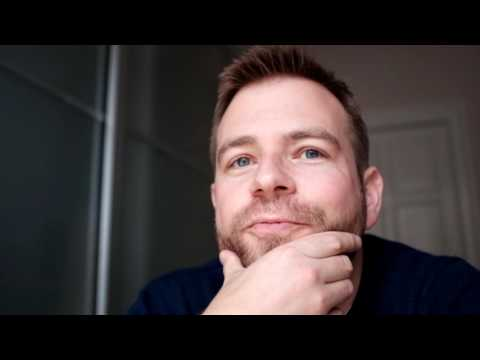

In [2]:
YouTubeVideo("wkYvdfkVmlI",width=800, height=450)

_Exercise_: Comparing in the different genres. 

*Setup*. You'll need to go to your archives and find the wikipedia pages of all the country artists. 

Once you have the texts ready, you will want to aggregate the text into 15 long lists, one for each of the top 15 genres (let's call them 15 *documents*). Each document contains on all the text in that genre (so for the country genre it's a looooong big doc). In each list, you should keep all the words (or *tokens* to be more precise) that occur on the pages, and a count of how frequently each word occurs. So the format should be

```
word0 count0
word1 count1
word2 count2

...

wordN countN
```
This list is called a ***Term Frequency*** (or TF) list for each community. Let's build our own TF lists. Before you start counting, I am going to ask you do do a few things

> *Action items*
> * Tokenize the pages into individual strings
> * Remove all punctuation from your list of tokens
> * Set everything to lower case
> * (Optional) Lemmatize your words
> * It's OK to filter out rare words (e.g. words that only appear less than 5 times).

If you are confused by the instructions for cleaning, go back and have a  look Chapter 3 again. 

> *Action item*: 
> * Create your TF list for each of the 15 most popular genres.
> * List the top 15 words for each genre.
> * Comment on the top 15 words for each genre.

<div class="alert alert-block alert-info">
It's OK to use an LLM to help with the code here, but write your own comments.
</div>

In [18]:

        
        
import re
import string
from collections import Counter
from bs4 import BeautifulSoup
from urllib.request import urlopen
import nltk

# Ensure you have the NLTK data downloaded
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load artist-genre dictionary from a text file
artist_genre_dict = {}
with open(r'C:\Users\jdiaz\Desktop\DTU_SocialGraphs\socialgraphs2024\artists_genres_dictionary.txt', 'r', encoding='utf-8') as f:
    content = f.read()
    artist_genre_dict = ast.literal_eval(content)  # Safely evaluate the dictionary format

# Initialize a dictionary to hold the Term Frequency (TF) data for each genre
tf_lists = {genre: Counter() for genre in set(genre for genres in artist_genre_dict.values() for genre in genres)}

# Function to fetch Wikipedia content
wiki_path = "https://en.wikipedia.org/wiki/"

# Process each artist
for artist, genres in artist_genre_dict.items():
    try:
        # Remove parentheses and their contents
        artist_cleaned = re.sub(r'\s*\(.*?\)', '', artist)  # Removes "(musician)" etc.
        
        # Fetching the Wikipedia page
        artist_url = wiki_path + artist_cleaned.replace(" ", "_")
        source = urlopen(artist_url).read()
        soup = BeautifulSoup(source, "html.parser")

        # Extract the plain text content from paragraphs
        text = ''
        for paragraph in soup.find_all('p'):
            text += paragraph.text

        # Clean the text: remove footnotes, newlines, and punctuation
        text = re.sub(r'\[.*?\]+', '', text)
        text = text.replace('\n', '')
        text = text.translate(str.maketrans('', '', string.punctuation)).lower()
        
        # Tokenization
        tokens = nltk.word_tokenize(text)

        # Update the Counter for each genre associated with the artist
        for genre in genres:
            tf_lists[genre].update(tokens)
    except Exception as e:
        print(f"Error fetching data for {artist}: {e}")

# Create and save TF lists
for genre, counter in tf_lists.items():
    # Filter out rare words (appear less than 5 times)
    filtered_tf = {word: count for word, count in counter.items() if count >= 5}

    # Sort and get top 15 words
    top_words = sorted(filtered_tf.items(), key=lambda item: item[1], reverse=True)[:15]

    # Create a safe output filename
    genre_safe = genre.replace(' ', '_').replace('/', '_')  # Replace spaces and slashes
    output_file = f"{genre_safe}_TF.txt"

    try:
        # Write TF list to file
        with open(output_file, 'w', encoding='utf-8') as out_file:
            for word, count in top_words:
                out_file.write(f"{word} {count}\n")
        
        # Print top words for comment
        print(f"Top 15 words for genre '{genre}':")
        for word, count in top_words:
            print(f"{word}: {count}")
        print("\n")
    except OSError as file_error:
        print(f"Error writing to file for genre '{genre}': {file_error}")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jdiaz\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jdiaz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jdiaz\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Error fetching data for Beyoncé: 'ascii' codec can't encode character '\xe9' in position 16: ordinal not in range(128)
Error fetching data for Maggie Björklund: 'ascii' codec can't encode character '\xf6' in position 19: ordinal not in range(128)
Error fetching data for Sherrié Austin: 'ascii' codec can't encode character '\xe9' in position 16: ordinal not in range(128)
Error fetching data for Toni Willé: 'ascii' codec can't encode character '\xe9' in position 19: ordinal not in range(128)
Top 15 words for genre 'opera':
the: 365
in: 199
and: 179
her: 153
to: 140
a: 132
of: 128
she: 112
was: 98
osmond: 90
with: 57
on: 56
show: 50
that: 50
marie: 49


Top 15 words for genre 'country music':
the: 1321
and: 850
in: 732
a: 526
of: 500
to: 410
was: 392
on: 350
his: 329
he: 328
with: 289
for: 228
as: 190
by: 171
country: 164


Top 15 words for genre 'psychedelia':
the: 350
and: 186
in: 146
of: 134
a: 128
to: 105
nesmith: 85
he: 77
his: 76
was: 73
on: 73
with: 55
for: 52
as: 51
monkees: 51




Top 15 words for genre 'a cappella':


Top 15 words for genre 'word play':
the: 443
in: 243
and: 225
a: 189
of: 172
martin: 127
he: 112
to: 111
on: 99
his: 97
for: 90
with: 85
was: 82
as: 63
comedy: 59


Top 15 words for genre 'cowboy music':


Top 15 words for genre 'folk music':
the: 294
and: 169
in: 159
a: 130
of: 128
to: 105
his: 101
he: 87
was: 85
on: 72
with: 56
that: 45
for: 45
by: 43
is: 38


Top 15 words for genre 'soft rock':
the: 6584
in: 3253
and: 3252
of: 2789
a: 2319
to: 1852
was: 1391
on: 1330
with: 1072
for: 975
his: 872
as: 792
he: 771
at: 735
album: 686


Top 15 words for genre 'country folk':
the: 1367
and: 793
in: 626
of: 561
a: 551
her: 418
was: 378
on: 378
to: 359
with: 278
she: 273
album: 265
for: 219
as: 178
by: 153


Top 15 words for genre 'canadiana':
the: 311
of: 158
and: 153
a: 146
in: 145
to: 122
was: 105
on: 84
his: 84
he: 78
for: 68
connors: 52
that: 48
album: 43
with: 42


Top 15 words for genre 'latin':
the: 721
and: 421
of: 372
in: 302
a: 299
to: 259
h

Top 15 words for genre 'rock':
the: 16243
and: 8874
in: 7227
of: 6898
a: 6165
to: 5051
on: 3949
was: 3820
with: 3200
for: 2667
his: 2520
as: 2327
he: 2232
album: 2220
her: 2027


Top 15 words for genre 'observational comedy':
the: 137
in: 71
and: 67
a: 63
of: 54
he: 43
his: 42
on: 36
to: 33
engvall: 30
as: 27
was: 27
at: 19
with: 19
show: 18


Top 15 words for genre 'christian music':
the: 50
in: 43
and: 32
a: 30
his: 20
of: 19
he: 15
was: 15
for: 14
as: 13
to: 13
on: 12
album: 12
she: 11
music: 10


Top 15 words for genre 'electronic':
the: 144
and: 82
in: 60
a: 53
his: 51
on: 46
was: 45
of: 44
with: 44
as: 40
to: 36
released: 33
marshmello: 32
by: 28
he: 23


Top 15 words for genre 'blue-eyed soul':
the: 1313
and: 646
of: 630
in: 582
a: 496
to: 397
on: 343
his: 338
he: 293
was: 283
with: 268
album: 199
morrison: 194
for: 177
as: 162


Top 15 words for genre 'electric blues':
the: 46
in: 25
and: 21
a: 20
of: 19
with: 17
blues: 13
for: 13
on: 13
album: 13
his: 12
was: 12
mcclinton: 10


It's not quite surprising that the top common appearance 15 words are the stop words since they are necessary for our grammar, however, with little important Information.

# Part 4: Visualization

**Step 1: Install the software**

First you must set up your system. The most difficult thing about creating the wordcloud is installing the `WordCloud` module. It's available on GitHub, check out the page [**here**](https://github.com/amueller/word_cloud). 

If you're lucky, you can simply install using conda (and all dependencies, etc will be automatically fixed): 

    conda install -c conda-forge wordcloud
 
If you can't get that to work you can refer here https://anaconda.org/conda-forge/wordcloud. 
Also, maybe the comments below are helpful: 
 * The module depends on the Python library PIL. If my experience generalizes, your life will be easier if you use `conda` to install that before you do anything else.
 * On my system, the module needed the `gcc` compiler installed. If you're not already a programmer, you may have to install that. On Mac you get it by installing the [_command line tools_](http://osxdaily.com/2014/02/12/install-command-line-tools-mac-os-x/). On linux, it's probably already installed. And on Windows I'm not sure, but we'll figure it out during the exercises. 
 * Once that's all set up, you can use `pip` to install the `WordCloud` library, as [detailed on the GitHub page](https://github.com/amueller/word_cloud). But don't forget to use Anaconda's `pip` just as when you installed the communities library a few weeks ago. 
 * There are examples of how to use the module online, see [here](http://sebastianraschka.com/Articles/2014_twitter_wordcloud.html) and [here](https://bioinfoexpert.com/2015/05/26/generating-word-clouds-in-python/). If you're interested, you can read about how the package was put together [here](http://peekaboo-vision.blogspot.dk/2012/11/a-wordcloud-in-python.html). 

**Step 2: Draw some wordclouds**

> *Action items*
> * Get your lists ready for the word-cloud software
>    - The package needs a single string to work on. The way that I converted my lists to a string was to simply combine all words together in one long string (separated by spaces), repeating each word according to its score (rounded up to the nearest integer value). 
>    - The `wordcloud` package looks for collocations in real texts, which is a problem when you make the list as above. The recommended fix is to simply set `collocations = False` as an option when you run the package.
> * Now, create a word-cloud for each genre. Feel free to make it as fancy or non-fancy as you like. Comment on the results. (If you'd like, you can remove stopwords/wiki-syntax - I did a bit of that for my own wordclouds.)

<div class="alert alert-block alert-info">
As above, it's OK to use an LLM to help get the code going. But write your own answers to the questions / write your own comments.
</div>

# Part 5: Understanding TF-IDF

Now we jump back into the NLP work. In this last part, we'll be creating word-clouds again. But this time, we'll be using the method from the paper I discuss above: TF-IDF. Historically people have had a hard time grasping the idea behind TF-IDF, so here's a little exercise designed to make you study it a bit more carefully.

*Exercise 4*: Wrap your brain around TF-IDF

First, let's learn about TF-IDF the way wikipedia explains it. Check out [the wikipedia page for TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf) and ***read the first part very carefully***. The idea is that the term frequency doesn't capture just what's special about a text. It also captures words that are just frequent in all text. 

This is clear from the top counts in one of my lists:

```
of 
in 
and 
the 
to 
a 
is
by
was
as
ref
with
first
 ```
 
You can fix some of this by removing stop-words (as is described in the book), but it's not enough. ***We want to pull out what's special about a particular text.*** 

To focus on just what's special, TF-IDF has two components: The *term frequency* (TF) and a *weight* (IDF). The weight draws on a larger corpus of text emphasize what's special about the text we're interested in.

Further, there are some extra things going on. For example, there are multiple definitions of TF. Above, we just looked at the raw counts.

> *Action items*
>   * Pick one of the alternative term frequency definitions. Explain why it might sometimes be prefereable to the raw count. **One common alternative is term frequency normalization, where the frequency of a term in a document is divided by the total number of terms in that document.**
>   * What does IDF stand for? Answer in your own words. **IDF stands for Inverse Document Frequency. It measures how much information a word provides, essentially indicating how unique or rare a term is across a collection of documents (the corpus).**
>   * How does IDF draw on a larger corpus to extract what's special a certain text? Answer in your own words. **IDF evaluates the rarity of terms across a broader context.**

There are also multiple versions of IDF. Let's think about those for a moment.

> *Action items*
>   * All of the IDF versions take the log of the calculated weight. Why do you think that is? **The logarithmic scale is used in IDF to reduce the impact of extreme values.**
>   * Explain why using IDF makes stopword removal less important. **Stopwords are common words (like "the," "is," and "and") that usually carry little semantic weight. Since IDF emphasizes rarity, common stopwords tend to have high IDF values because they appear in many documents. Consequently, their contribution to the overall TF-IDF score will be diminished.**

<div class="alert alert-block alert-info">
The point of this exercise is to understand TF-IDF. So I encourage you to ask questions to an LLM to really understand the concept. Perhaps ask it to explain TF-IDF at the level of a high-school student. Once you've done that, then answer the questions in the action items on your own.
</div>

# Part 6: Genres and TF-IDF word-clouds

**But wait a minute!** Now we have all of the ingredients for a wonderful cocktail 😎

* We have genres - descriptions of related nodes in the network. 
* And you're an expert on TF-IDF, so you can extract words that characterize a text relative to everything that's going on.
* Finally, you can create nice WordCouds!

So let's put it all together. Let's use TF-IDF and wordcoulds to build a deeper understanding of the top communities.

Thus, the aim of this final part is to create genre wordclouds for the top 15 genres based on TF-IDF. 

For each genre, create a single document for each community consisting of all the cleaned text from all members of the community. So in the end, you should have 15 documents in total.

_Exercise_: Genre Word-clouds

> * Now that we have the community-texts, let's start by grabbing the TF lists from the exercise above (you may modify to use whichever version of TF you like). 
> * Next, calculate IDF for every word in every list (use whichever version of IDF you like). 
>   * Which base logarithm did you use? Is that important?
> * We're now ready to calculate TF-IDFs. Do that for each genre. 
>   * List the 10 top words for each genre accourding to TF-IDF. Are these 10 words more descriptive of the genre than just the TF? Justify your answer.
> * Create a wordcloud for each genre. 
> * Explain your creation. Do the wordclouds/TF-IDF lists enable you to understand the communities you have found (or is it just gibberish)? Justify your answer.

<div class="alert alert-block alert-info">
Overall, it's OK to use an LLM to help with the code. But do write your own answers to the questions.
</div>

In [1]:
import json

# Load the artist-genre dictionary
with open('artists_genres_dictionary.txt', 'r', encoding='utf-8') as f:
    artist_genre_dict = json.load(f)

# Count the occurrences of each genre
genre_count = {}
for genres in artist_genre_dict.values():
    for genre in genres:
        genre_count[genre] = genre_count.get(genre, 0) + 1

# Get the top 15 genres
top_genres = sorted(genre_count, key=genre_count.get, reverse=True)[:15]

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
import string

wiki_path = "https://en.wikipedia.org/wiki/"
genre_texts = {genre: "" for genre in top_genres}

for artist, genres in artist_genre_dict.items():
    # Clean the artist name for URL
    clean_artist = artist.split(" (")[0]  # Remove anything in parentheses
    try:
        source = urlopen(wiki_path + clean_artist.replace(" ", "_")).read()
        soup = BeautifulSoup(source, "html.parser")

        # Extract the plain text content from paragraphs
        text = ''
        for paragraph in soup.find_all('p'):
            text += paragraph.text

        # Clean the text
        text = re.sub(r'\[.*?\]+', '', text)  # Remove footnotes
        text = text.replace('\n', ' ').translate(str.maketrans('', '', string.punctuation)).lower()
        
        # Add text to the corresponding genres
        for genre in genres:
            if genre in genre_texts:  # Only include top genres
                genre_texts[genre] += text + " "
    except Exception as e:
        print(f"Error fetching data for {clean_artist}: {e}")
        
from collections import Counter

# Function to calculate normalized term frequency
def calculate_tf(document):
    tokens = document.split()
    tf_counts = Counter(tokens)
    total_terms = len(tokens)
    tf_normalized = {word: count / total_terms for word, count in tf_counts.items()}
    return tf_normalized

# Calculate TF for each genre
tf_lists = {genre: calculate_tf(text) for genre, text in genre_texts.items()}

import math

def calculate_idf(documents):
    idf_counts = {}
    total_documents = len(documents)

    # Count how many documents contain each word
    for doc in documents:
        unique_words = set(doc.split())
        for word in unique_words:
            idf_counts[word] = idf_counts.get(word, 0) + 1
    
    # Calculate IDF
    idf = {word: math.log(total_documents / count) for word, count in idf_counts.items()}
    return idf

# Prepare list of all genre texts for IDF calculation
all_genre_documents = list(genre_texts.values())
idf_values = calculate_idf(all_genre_documents)

# Calculate TF-IDF for each genre
tf_idf = {}
for genre in top_genres:
    tf_idf[genre] = {word: tf * idf_values[word] for word, tf in tf_lists[genre].items()}
    
# List top 10 words for each genre based on TF-IDF
top_words = {}
for genre, scores in tf_idf.items():
    top_words[genre] = sorted(scores.items(), key=lambda item: item[1], reverse=True)[:10]

Error fetching data for Beyoncé: 'ascii' codec can't encode character '\xe9' in position 16: ordinal not in range(128)
Error fetching data for Maggie Björklund: 'ascii' codec can't encode character '\xf6' in position 19: ordinal not in range(128)
Error fetching data for Sherrié Austin: 'ascii' codec can't encode character '\xe9' in position 16: ordinal not in range(128)
Error fetching data for Toni Willé: 'ascii' codec can't encode character '\xe9' in position 19: ordinal not in range(128)


In [5]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


DEPRECATION: Loading egg at c:\users\jdiaz\appdata\local\programs\python\python311\lib\site-packages\fairlearn-0.11.0.dev0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at c:\users\jdiaz\appdata\local\programs\python\python311\lib\site-packages\pyarrow-17.0.0-py3.11-win-amd64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


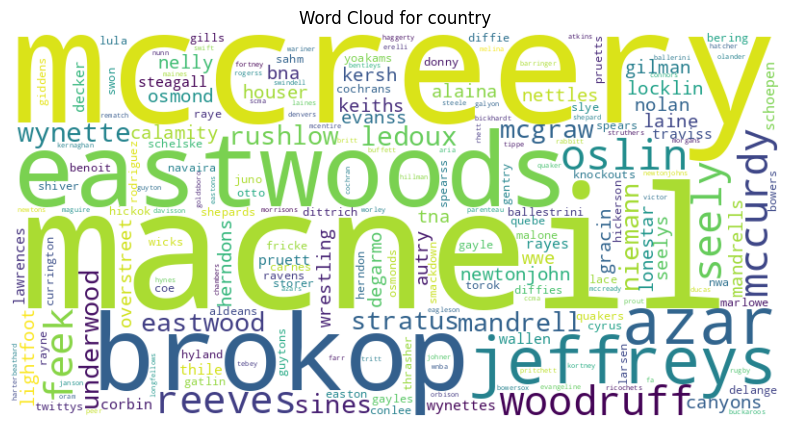

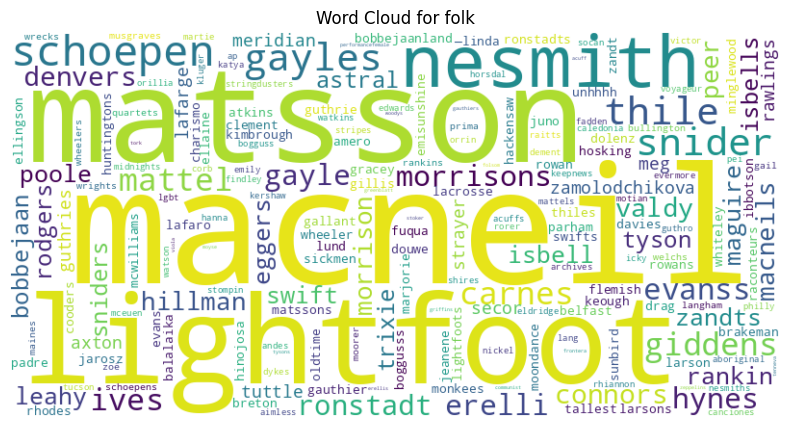

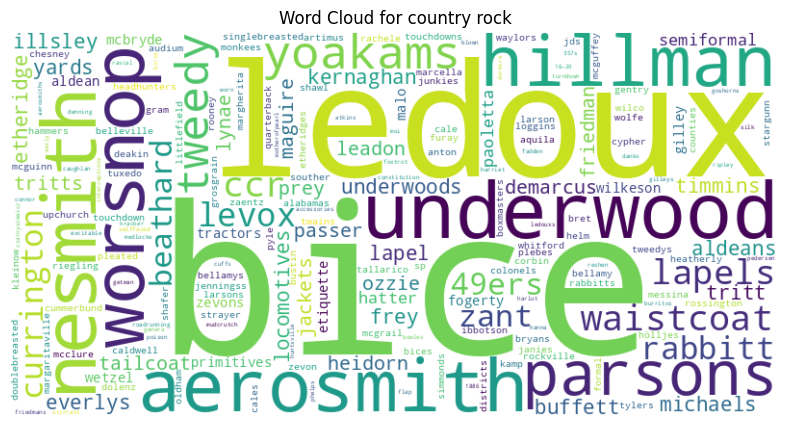

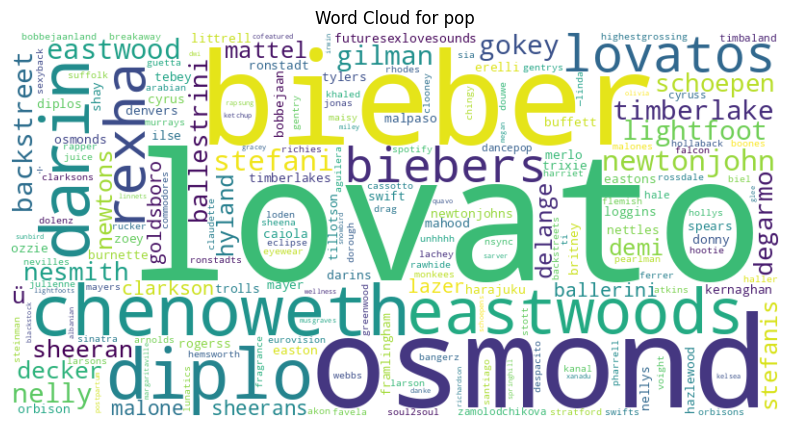

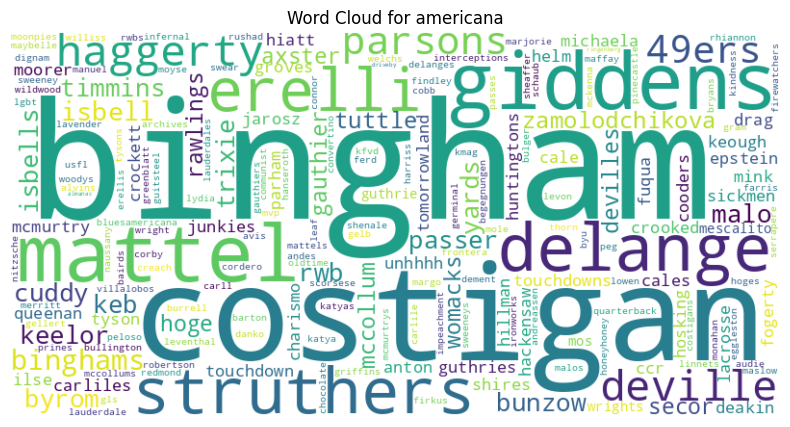

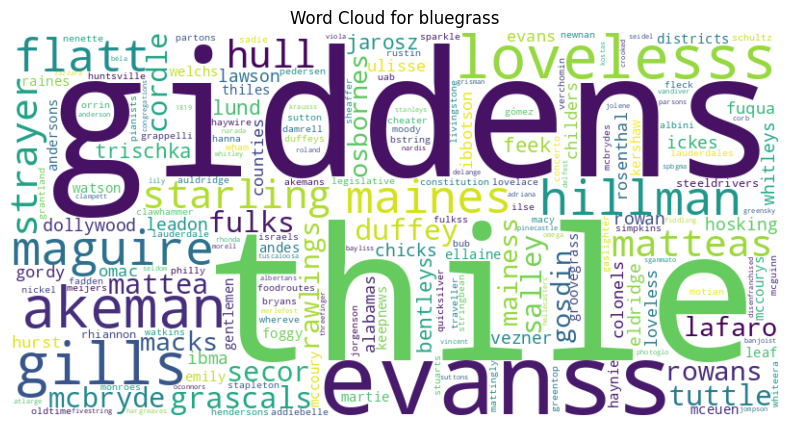

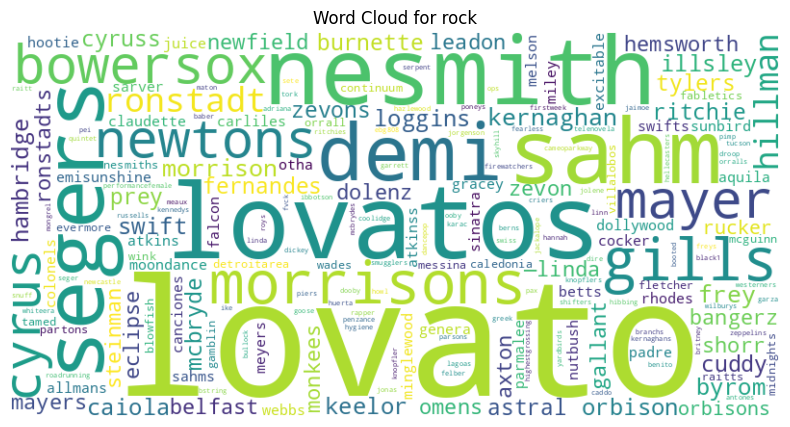

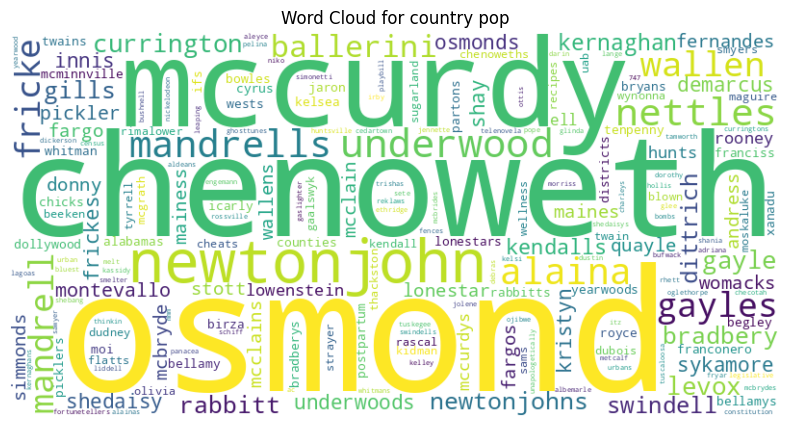

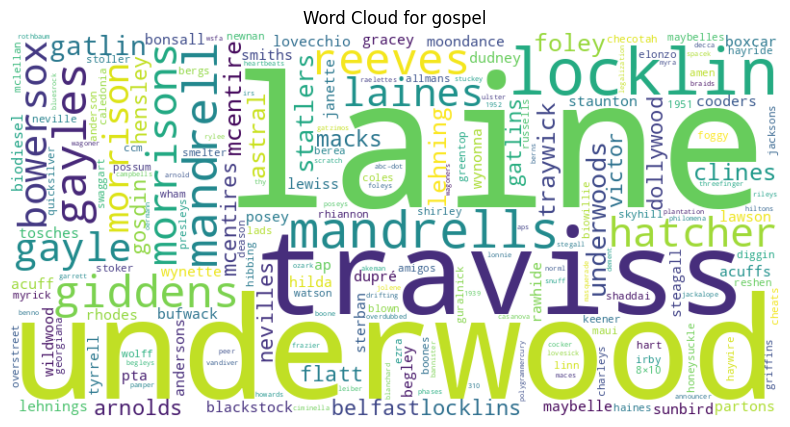

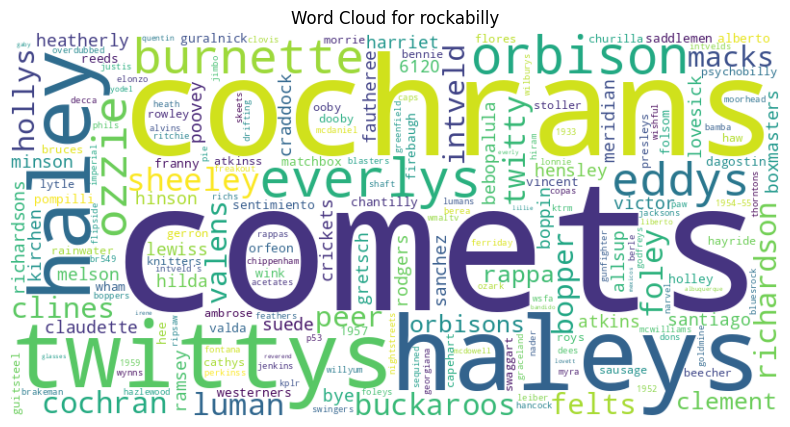

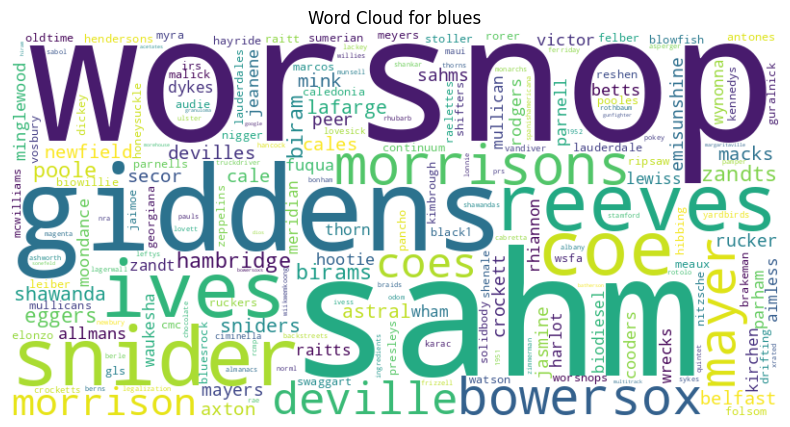

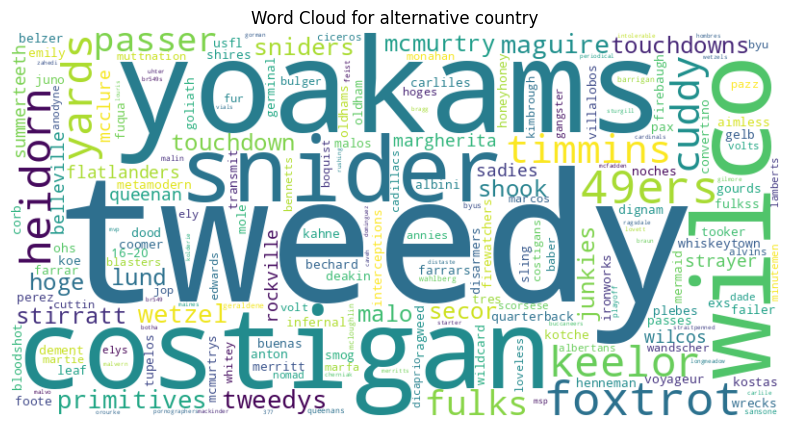

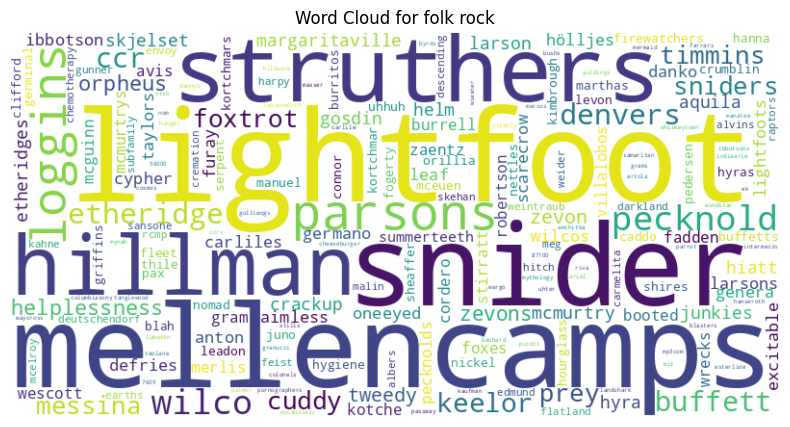

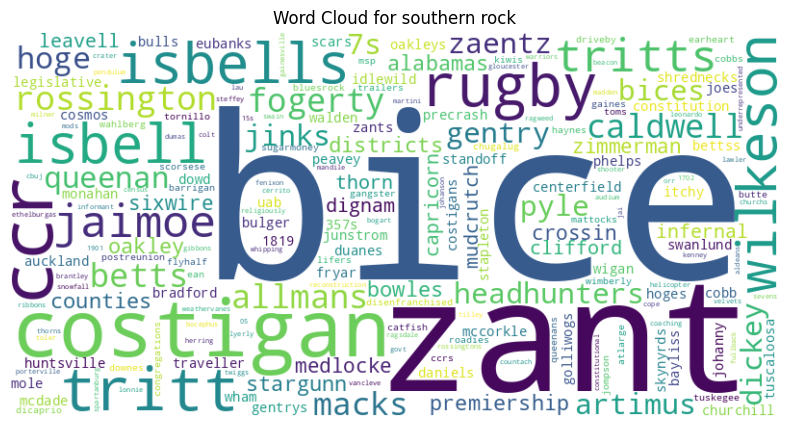

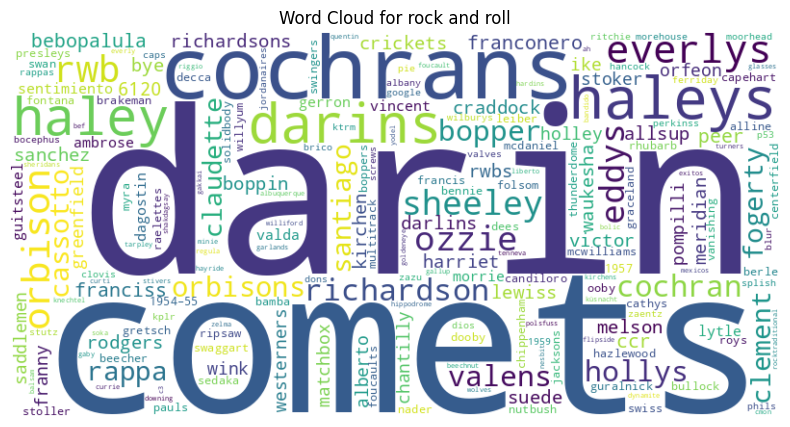

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud for each genre
for genre in top_genres:
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tf_idf[genre])
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {genre}')
    plt.show()

*Exercise*: Community Word-clouds (optional)
> * Redo the exercise above but for the structural communities.
> * Do the word clouds seem more meaningful than for the genres? Add nuance to your answer by considering the confusion matrix $D$ that you calculated above.

<div class="alert alert-block alert-info">
Since this is optional, you can do wat you want with LLMs. Maybe you can get one to solve the whole exercise?
</div>